Joao Quinta

## TP 8

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
from tqdm import tqdm

### EX 1

#### .1

(a)  
  
The procedure is called a minority game because it is a strategic decision-making game where we (the agent) aim to choose the action that will put us in the minority group.  
There are N agents with S strategies available --> each agent n tries to predict the strategy s that will be less populer. 
  
(b)  
Γi represents the "inverse temperature" parameter for agent i  
Large Γi means the agent will be more sensitive to the differences in utilities among its strategies.  
Small Γi means that the agent will be less sensitive to the differences in utilities.  

The smaller the Γi the more stohastic the choice becomes

#### .2

In [4]:
def run_minority_game(N, M, S, T=100, gamma=0.01, beta=1):
    # Initialize history with random values
    hist = np.random.randint(0, 2**M)

    # Initialize the utilities matrix for each agent and strategy
    util = np.zeros((N, S))

    # Create random strategies for each agent
    strats = np.random.randint(0, 2, (N, S, 2**M))
    attendance_list = []

    for t in range(T):
        # Compute softmax for each agent's strategy
        softmax_values = np.exp(gamma * util) / np.sum(np.exp(gamma * util), axis=1, keepdims=True)
        random_value = np.random.random()
        cum_softmax = np.cumsum(softmax_values, axis=1)
        chosen_strat = np.argmin(np.array(np.where(cum_softmax > random_value, cum_softmax, np.inf)), axis=1)

        # Get the action for each agent based on the chosen strategy
        actions = np.array([strats[i, s, hist] for i, s in enumerate(chosen_strat)])
        mod_actions = np.where(actions != 0, actions, -1)

        # Calculate the attendance
        total_attendance = np.sum(mod_actions)

        # Update utilities for the chosen strategies
        for i, s in enumerate(chosen_strat):
            util[i, s] -= mod_actions[i] * (total_attendance / beta)
        
        # Update history
        hist = ((hist << 1) + np.random.randint(0, 2)) % (2**M)

        attendance_list.append(total_attendance)
    
    return attendance_list

#### .3

In [5]:
np.random.seed(42)
all_M = np.arange(0, 19)
all_N = [51, 101, 251, 501, 1001]
S = 2

alphas = [[2**m_i/n_i for n_i in all_N] for m_i in all_M]
res_sigmas_m = []

for M in tqdm(all_M):
    res_sigmas = []
    for N in all_N:
        res = run_minority_game(N, M, S)
        res_sigmas.append(np.var(res) / N)
    res_sigmas_m.append(res_sigmas)


100%|██████████| 19/19 [00:14<00:00,  1.34it/s]


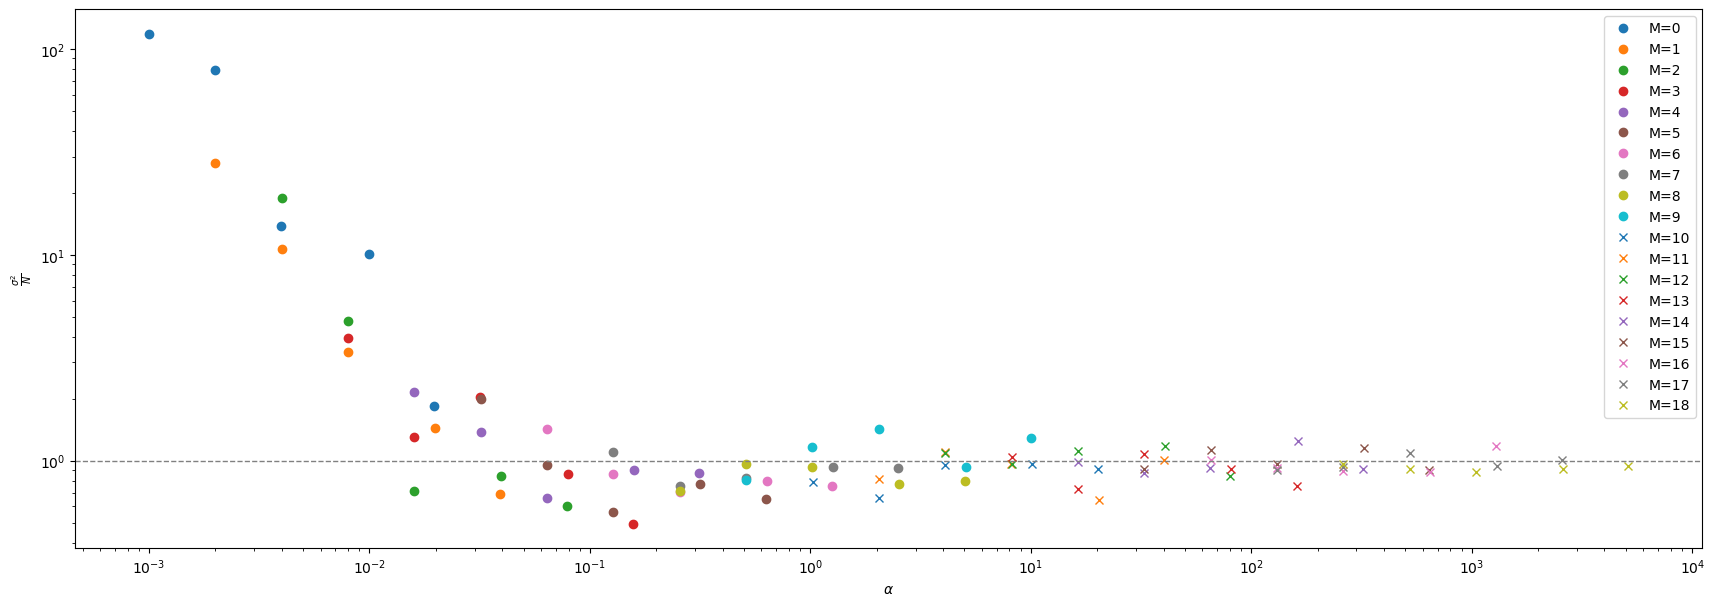

In [6]:
plt.figure(figsize=(21, 7))
for m_i in range(len(all_M)):
    if m_i < 10:
        plt.loglog(alphas[m_i], res_sigmas_m[m_i], "o", label=f"M={all_M[m_i]}")
    else:
        plt.loglog(alphas[m_i], res_sigmas_m[m_i], "x", label=f"M={all_M[m_i]}")

plt.axhline(y=1, color='gray', linestyle='--', lw=1)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\frac{\sigma^2}{N}$")
plt.legend()
plt.show()


#### .4

In [7]:
alpha_critical_idx = np.argmin(res_sigmas_m[3])
alpha_critical_value = alphas[3][alpha_critical_idx]
print(f"Alpha critical when the volatility is minimal is {alpha_critical_value}, with M=3")

Alpha critical when the volatility is minimal is 0.1568627450980392, with M=3
